# Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Import Data

In [4]:
# from google.colab import files
# df = files.upload()

In [5]:
df = pd.read_excel('Projek data.xlsx')
df.head()

,Timestamp,Nama panggilan,Angkatan,Pengeluaran_perminggu,Frekuensi_makan,Pengeluaran_makan,Transportasi,Uang_Transport,Jarak,Frekuensi_Nongkrong,Rokok,Laundry,Organisasi
0,2023-05-15 10:58:36.677,farrel,22,200000,2,15000,kendaraan pribadi,50000,2.0,3,Tidak,Tidak,0
1,2023-05-15 10:59:50.494,Fikar,22,300000,3,30000,ojek,43500,19.0,0,Tidak,Tidak,1
2,2023-05-15 11:00:28.043,Kareem,22,150000,2,30000,ojek,175000,3.9,1,Ya,Tidak,0
3,2023-05-15 11:02:12.665,aura,22,120000,3,12000,ojek,225000,4.0,3,Tidak,Tidak,0
4,2023-05-15 11:03:47.088,Tika,22,100000,3,20000,kendaraan pribadi,20000,4.0,3,Tidak,Ya,0


# Data Preporcessing

## Cek Data Type

In [6]:
df = df.drop(columns = ['Timestamp', 'Nama panggilan','Angkatan'])
df.head()

,Pengeluaran_perminggu,Frekuensi_makan,Pengeluaran_makan,Transportasi,Uang_Transport,Jarak,Frekuensi_Nongkrong,Rokok,Laundry,Organisasi
0,200000,2,15000,kendaraan pribadi,50000,2.0,3,Tidak,Tidak,0
1,300000,3,30000,ojek,43500,19.0,0,Tidak,Tidak,1
2,150000,2,30000,ojek,175000,3.9,1,Ya,Tidak,0
3,120000,3,12000,ojek,225000,4.0,3,Tidak,Tidak,0
4,100000,3,20000,kendaraan pribadi,20000,4.0,3,Tidak,Ya,0


In [7]:
df_dtypes = pd.DataFrame({'Columns':df.columns})

lst_nilai = []
for i in df_dtypes['Columns']:
  lst_nilai.append(df[[i]].sample(1).values[[0]])

df_dtypes['Value'] = lst_nilai
df_dtypes['Data Types'] = df.dtypes.values

df_dtypes = df_dtypes.reset_index().drop(columns = ['index'])
df_dtypes

,Columns,Value,Data Types
0,Pengeluaran_perminggu,[[700000]],int64
1,Frekuensi_makan,[[2]],int64
2,Pengeluaran_makan,[[20000]],int64
3,Transportasi,[[kendaraan pribadi]],object
4,Uang_Transport,[[0]],int64
5,Jarak,[[13.0]],float64
6,Frekuensi_Nongkrong,[[0]],int64
7,Rokok,[[Tidak]],object
8,Laundry,[[Ya]],object
9,Organisasi,[[0]],int64


## Cek missing values

In [8]:
df.isnull().sum()

Pengeluaran_perminggu    0
Frekuensi_makan          0
Pengeluaran_makan        0
Transportasi             0
Uang_Transport           0
Jarak                    0
Frekuensi_Nongkrong      0
Rokok                    0
Laundry                  0
Organisasi               0
dtype: int64

In [9]:
lst_missval = []

for i in df.isnull().sum():
  lst_missval.append((i / len(df) * 100))

df_missval = pd.DataFrame({'Column Name':df.columns,
                           'Missing Value Percentage (%)':np.round(lst_missval,2),
                           'Data Types':df.dtypes})

df_missval = df_missval.sort_values(by='Missing Value Percentage (%)', 
                       ascending = False).reset_index().drop(columns = 'index')

df_missval    

,Column Name,Missing Value Percentage (%),Data Types
0,Pengeluaran_perminggu,0.0,int64
1,Frekuensi_makan,0.0,int64
2,Pengeluaran_makan,0.0,int64
3,Transportasi,0.0,object
4,Uang_Transport,0.0,int64
5,Jarak,0.0,float64
6,Frekuensi_Nongkrong,0.0,int64
7,Rokok,0.0,object
8,Laundry,0.0,object
9,Organisasi,0.0,int64


# Encoding

In [10]:
df.head()

,Pengeluaran_perminggu,Frekuensi_makan,Pengeluaran_makan,Transportasi,Uang_Transport,Jarak,Frekuensi_Nongkrong,Rokok,Laundry,Organisasi
0,200000,2,15000,kendaraan pribadi,50000,2.0,3,Tidak,Tidak,0
1,300000,3,30000,ojek,43500,19.0,0,Tidak,Tidak,1
2,150000,2,30000,ojek,175000,3.9,1,Ya,Tidak,0
3,120000,3,12000,ojek,225000,4.0,3,Tidak,Tidak,0
4,100000,3,20000,kendaraan pribadi,20000,4.0,3,Tidak,Ya,0


In [11]:
df['Transportasi'].value_counts()

kendaraan pribadi    35
ojek                 13
nebeng temen          7
Name: Transportasi, dtype: int64

In [12]:
df['Rokok'].value_counts()

Tidak    47
Ya        8
Name: Rokok, dtype: int64

In [13]:
df['Laundry'].value_counts()

Tidak    34
Ya       21
Name: Laundry, dtype: int64

## dummy encoding

In [14]:
df_dummy = df.copy()

df_dummy = pd.get_dummies(df_dummy, drop_first=True)
df_dummy.head()

,Pengeluaran_perminggu,Frekuensi_makan,Pengeluaran_makan,Uang_Transport,Jarak,Frekuensi_Nongkrong,Organisasi,Transportasi_nebeng temen,Transportasi_ojek,Rokok_Ya,Laundry_Ya
0,200000,2,15000,50000,2.0,3,0,0,0,0,0
1,300000,3,30000,43500,19.0,0,1,0,1,0,0
2,150000,2,30000,175000,3.9,1,0,0,1,1,0
3,120000,3,12000,225000,4.0,3,0,0,1,0,0
4,100000,3,20000,20000,4.0,3,0,0,0,0,1


## RedHot Encoding

In [15]:
df_onehot = df.copy()

df_onehot = pd.get_dummies(df_onehot)
df_onehot.head()

,Pengeluaran_perminggu,Frekuensi_makan,Pengeluaran_makan,Uang_Transport,Jarak,Frekuensi_Nongkrong,Organisasi,Transportasi_kendaraan pribadi,Transportasi_nebeng temen,Transportasi_ojek,Rokok_Tidak,Rokok_Ya,Laundry_Tidak,Laundry_Ya
0,200000,2,15000,50000,2.0,3,0,1,0,0,1,0,1,0
1,300000,3,30000,43500,19.0,0,1,0,0,1,1,0,1,0
2,150000,2,30000,175000,3.9,1,0,0,0,1,0,1,1,0
3,120000,3,12000,225000,4.0,3,0,0,0,1,1,0,1,0
4,100000,3,20000,20000,4.0,3,0,1,0,0,1,0,0,1


# Exploratory Data Analysis

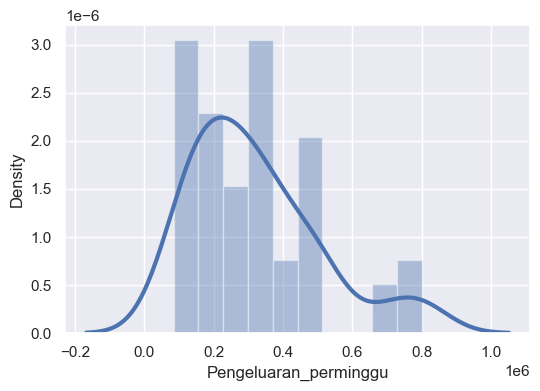

<function matplotlib.pyplot.show(close=None, block=None)>

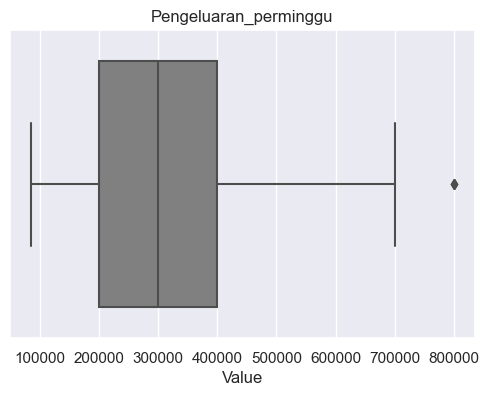

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(6,4)}) 
sns.distplot(df['Pengeluaran_perminggu'], bins=10, kde_kws={'linewidth': 3})
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x=df['Pengeluaran_perminggu'], color='grey')
plt.xlabel('Value')
plt.title('Pengeluaran_perminggu')
plt.show

In [17]:
df.drop(columns=['Pengeluaran_perminggu']).columns

Index(['Frekuensi_makan', 'Pengeluaran_makan', 'Transportasi',
       'Uang_Transport', 'Jarak', 'Frekuensi_Nongkrong', 'Rokok', 'Laundry',
       'Organisasi'],
      dtype='object')

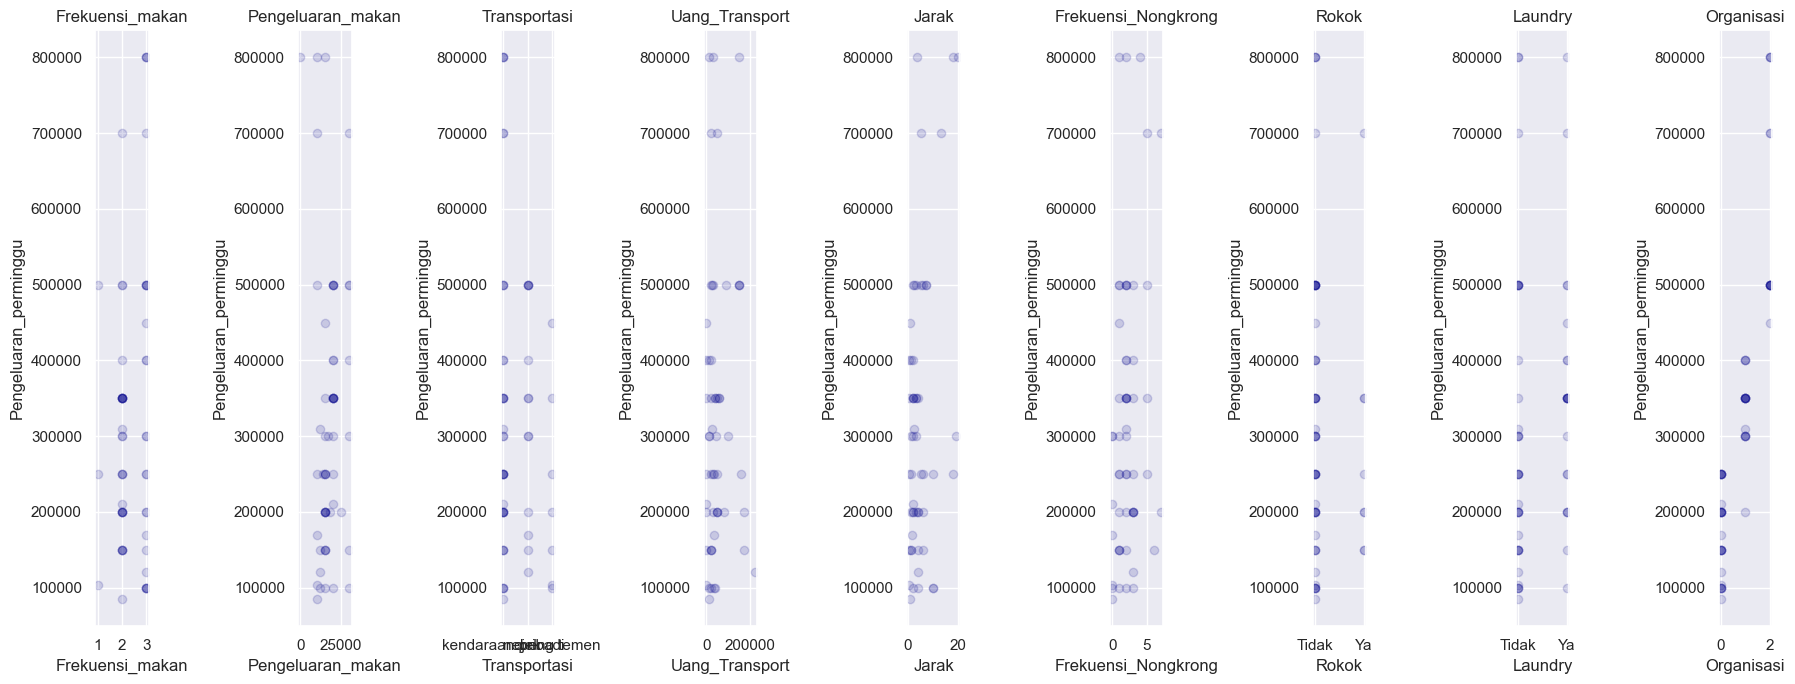

In [18]:
plt.figure(figsize=(18, 7))

predictors = df.drop(columns=['Pengeluaran_perminggu']).columns
response = df['Pengeluaran_perminggu']

for i, col in enumerate(predictors):
    plt.subplot(1, len(predictors) , i+1)
    x = df[col]
    y = response
    plt.scatter(x, y, marker='o', color='darkblue', alpha=0.15)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Pengeluaran_perminggu')
    plt.tight_layout()

<Axes: >

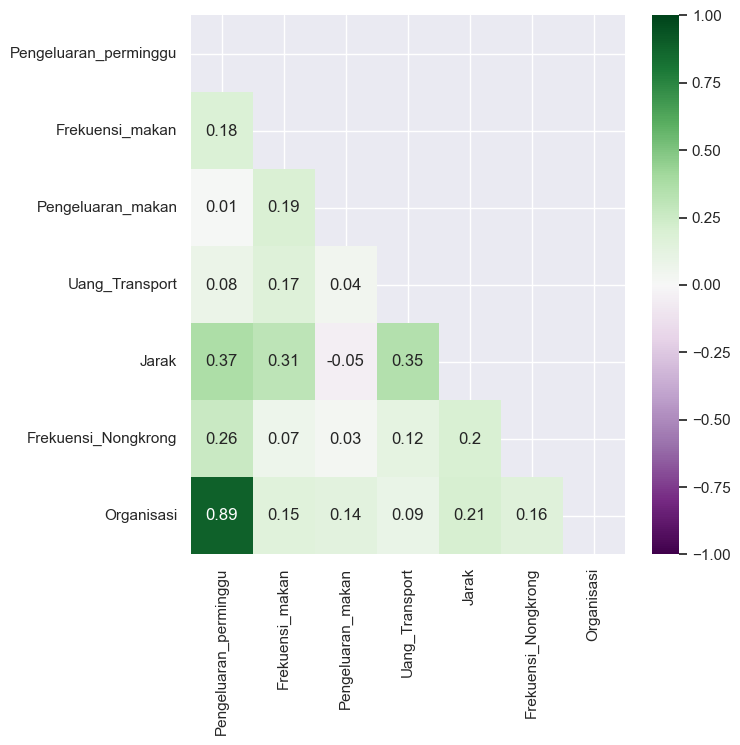

In [19]:
import numpy as np

#untuk mengetahui korelasi linier antar variabel
mask = np.triu(np.ones_like(df.corr())) #agar yang muncul segitiga bawah
 
# annot = True untuk mencetak/ menampilkan nilai korelasi di dalam kotak
sns.set(rc={'figure.figsize':(7,7)}) 
sns.heatmap(df.corr(method='pearson').round(2), annot=True, cmap='PRGn', mask=mask, vmin=-1, vmax=1)

# Bar Chart

# Pie Chart

# Barplot (Variabel Kategorik)

# Multiple Linear Regretion

## Regression with Dummy Encoding

### Create OLS model

In [20]:
import statsmodels.api as sm

x_dummy = df_dummy.drop(columns=['Pengeluaran_perminggu'])
y_dummy = df_dummy['Pengeluaran_perminggu']

X_dummy = sm.add_constant(x_dummy)
result_dummy = sm.OLS(y_dummy, X_dummy).fit()
print(result_dummy.summary())

                              OLS Regression Results                             
Dep. Variable:     Pengeluaran_perminggu   R-squared:                       0.864
Model:                               OLS   Adj. R-squared:                  0.833
Method:                    Least Squares   F-statistic:                     28.02
Date:                   Sun, 21 May 2023   Prob (F-statistic):           7.10e-16
Time:                           14:38:45   Log-Likelihood:                -690.36
No. Observations:                     55   AIC:                             1403.
Df Residuals:                         44   BIC:                             1425.
Df Model:                             10                                         
Covariance Type:               nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------

### Regression Equation


**Persamaan regresi dari output tersebut adalah:**

cnt = 2933.4104  + 5818.3184 (temp) + 406.0477 (atemp) - 2610.9173(hum) - 3280.3364(windspeed) - 469.1203(season_springer) + 448.5441(season_summer) + 1024.6716(season_winter) + 596.8185(holiday_not holiday) + 101.1146(workingday_workingday) - 1941.7010(weathersit_light snow) - 233.9494(weathersit_mist).

**Keterangan:**


*   Variabel dependen: cnt.
*   Variabel independen: season, holiday, workingday, weathersit, temp, atemp, hum, windspeed



### Significance Test

#### Simultan test

$H_{0}: \beta_{1} = \beta_{2} = \beta_{3} = \beta_{4} = \beta_{5} = \beta_{6} = \beta_{7} = \beta_{8} = \beta_{9} = \beta_{10} = \beta_{11} = 0$


$H_{1}$: minimal ada satu $\beta_{i}  \neq 0$, $i=1,2,3,4,5,6,7,8,9,10,11$

In [21]:
df_simultan_dummy = pd.DataFrame({'F-hitung':[result_dummy.fvalue],
                                  'p-value':[result_dummy.f_pvalue],
                                  'alpha':[0.1]})

df_simultan_dummy['Kesimpulan'] = df_simultan_dummy['p-value'].gt((df_simultan_dummy['alpha']))
df_simultan_dummy['Kesimpulan'] = df_simultan_dummy['Kesimpulan'].replace({True:'Gagal Tolak H0',
                                                                           False:'Tolak H0'})

df_simultan_dummy

,F-hitung,p-value,alpha,Kesimpulan
0,28.019155,7.104074e-16,0.1,Tolak H0


#### Partial Test

Untuk $\beta_{1}$

$H_{0}: \beta_{1} = 0$

$H_{1}: \beta_{1} \neq 0$

Untuk $\beta_{2}$

$H_{0}: \beta_{2} = 0$

$H_{1}: \beta_{2} \neq 0$

Untuk $\beta_{3}$

$H_{0}: \beta_{3} = 0$

$H_{1}: \beta_{3} \neq 0$

Untuk $\beta_{4}$

$H_{0}: \beta_{4} = 0$

$H_{1}: \beta_{4} \neq 0$

Untuk $\beta_{5}$

$H_{0}: \beta_{5} = 0$

$H_{1}: \beta_{5} \neq 0$

Untuk $\beta_{6}$

$H_{0}: \beta_{6} = 0$

$H_{1}: \beta_{6} \neq 0$

Untuk $\beta_{7}$

$H_{0}: \beta_{7} = 0$

$H_{1}: \beta_{7} \neq 0$

Untuk $\beta_{8}$

$H_{0}: \beta_{8} = 0$

$H_{1}: \beta_{8} \neq 0$

Untuk $\beta_{9}$

$H_{0}: \beta_{9} = 0$

$H_{1}: \beta_{9} \neq 0$

Untuk $\beta_{10}$

$H_{0}: \beta_{10} = 0$

$H_{1}: \beta_{10} \neq 0$

Untuk $\beta_{11}$

$H_{0}: \beta_{11} = 0$

$H_{1}: \beta_{11} \neq 0$

In [22]:
df_partial_dummy = pd.DataFrame()
df_partial_dummy['Variabel'] = result_dummy.tvalues.index
df_partial_dummy['t-hitung'] = result_dummy.tvalues.values
df_partial_dummy['p-value'] = result_dummy.pvalues.values
df_partial_dummy['alpha'] = 0.1

df_partial_dummy['Kesimpulan'] = df_partial_dummy['p-value'].gt((df_partial_dummy['alpha']))
df_partial_dummy['Kesimpulan'] = df_partial_dummy['Kesimpulan'].replace({True:'Gagal Tolak H0',
                                                                           False:'Tolak H0'})

df_partial_dummy

,Variabel,t-hitung,p-value,alpha,Kesimpulan
0,const,3.322492,1.802742e-03,0.1,Tolak H0
1,Frekuensi_makan,0.006524,9.948239e-01,0.1,Gagal Tolak H0
2,Pengeluaran_makan,-1.864644,6.891026e-02,0.1,Tolak H0
3,Uang_Transport,-0.253315,8.012044e-01,0.1,Gagal Tolak H0
4,Jarak,2.669565,1.059885e-02,0.1,Tolak H0
5,Frekuensi_Nongkrong,0.992284,3.264848e-01,0.1,Gagal Tolak H0
6,Organisasi,13.112686,8.420871e-17,0.1,Tolak H0
7,Transportasi_nebeng temen,-0.632588,5.302769e-01,0.1,Gagal Tolak H0
8,Transportasi_ojek,-0.544329,5.889629e-01,0.1,Gagal Tolak H0
9,Rokok_Ya,-0.236653,8.140244e-01,0.1,Gagal Tolak H0


## Regression with One-Hot Encoding

### Create OLS Model

In [23]:
import statsmodels.api as sm

x_onehot = df_onehot.drop(columns=['Pengeluaran_perminggu'])
y_onehot = df_onehot['Pengeluaran_perminggu']

X_onehot = sm.add_constant(x_onehot)
result_onehot = sm.OLS(y_onehot, X_onehot).fit()
print(result_onehot.summary())

                              OLS Regression Results                             
Dep. Variable:     Pengeluaran_perminggu   R-squared:                       0.864
Model:                               OLS   Adj. R-squared:                  0.833
Method:                    Least Squares   F-statistic:                     28.02
Date:                   Sun, 21 May 2023   Prob (F-statistic):           7.10e-16
Time:                           14:38:46   Log-Likelihood:                -690.36
No. Observations:                     55   AIC:                             1403.
Df Residuals:                         44   BIC:                             1425.
Df Model:                             10                                         
Covariance Type:               nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

### Regression Equation

Persamaan regresi dari output tersebut adalah:

**Persamaan regresi dari output tersebut adalah:**

cnt = 1.213e+16   + 5746.5581 (temp) + 494.4492 (atemp) - 2608.7129(hum) - 3289.7877(windspeed) + 2.71e+15(season_fall) + 2.71e+153(season_springer) + 2.71e+15(season_summer) + 2.71e+15 (season_winter) - 8.171e+15(holiday_holiday - 8.171e+15(holiday_not holiday) - 3.129e+15(workingday_not workingday) - 3.129e+15(workingday_workingday) - 3.543e+15(weathersit_clear) - 3.543e+15 (weathersit_light snow) - 3.543e+15 (weathersit_mist).

**Keterangan:**


*   Variabel dependen: cnt.
*   Variabel independen: season, holiday, workingday, weathersit, temp, atemp, hum, windspeed



### Significance Test

#### Simultan Test

$H_{0}: \beta_{1} = \beta_{2} = \beta_{3} = \beta_{4} = \beta_{5} = \beta_{6} = \beta_{7} = \beta_{8} = \beta_{9} = \beta_{10} = \beta_{11} = \beta_{12} = \beta_{13} = \beta_{14} = \beta_{15} = 0$


$H_{1}$: minimal ada satu $\beta_{i}  \neq 0$, $i=1,2,3,4,5,6,7,8,9,10,11,12,13,14,15$

In [24]:
df_simultan_onehot = pd.DataFrame({'F-hitung':[result_onehot.fvalue],
                                  'p-value':[result_onehot.f_pvalue],
                                  'alpha':[0.1]})

df_simultan_onehot['Kesimpulan'] = df_simultan_onehot['p-value'].gt((df_simultan_onehot['alpha']))
df_simultan_onehot['Kesimpulan'] = df_simultan_onehot['Kesimpulan'].replace({True:'Gagal Tolak H0',
                                                                           False:'Tolak H0'})

df_simultan_onehot

,F-hitung,p-value,alpha,Kesimpulan
0,28.019155,7.104074e-16,0.1,Tolak H0


#### Partial Test

Untuk $\beta_{1}$

$H_{0}: \beta_{1} = 0$

$H_{1}: \beta_{1} \neq 0$

Untuk $\beta_{2}$

$H_{0}: \beta_{2} = 0$

$H_{1}: \beta_{2} \neq 0$

Untuk $\beta_{3}$

$H_{0}: \beta_{3} = 0$

$H_{1}: \beta_{3} \neq 0$

Untuk $\beta_{4}$

$H_{0}: \beta_{4} = 0$

$H_{1}: \beta_{4} \neq 0$

Untuk $\beta_{5}$

$H_{0}: \beta_{5} = 0$

$H_{1}: \beta_{5} \neq 0$

Untuk $\beta_{6}$

$H_{0}: \beta_{6} = 0$

$H_{1}: \beta_{6} \neq 0$

Untuk $\beta_{7}$

$H_{0}: \beta_{7} = 0$

$H_{1}: \beta_{7} \neq 0$

Untuk $\beta_{8}$

$H_{0}: \beta_{8} = 0$

$H_{1}: \beta_{8} \neq 0$

Untuk $\beta_{9}$

$H_{0}: \beta_{9} = 0$

$H_{1}: \beta_{9} \neq 0$

Untuk $\beta_{10}$

$H_{0}: \beta_{10} = 0$

$H_{1}: \beta_{10} \neq 0$

Untuk $\beta_{11}$

$H_{0}: \beta_{11} = 0$

$H_{1}: \beta_{11} \neq 0$

Untuk $\beta_{12}$

$H_{0}: \beta_{12} = 0$

$H_{1}: \beta_{12} \neq 0$

Untuk $\beta_{13}$

$H_{0}: \beta_{13} = 0$

$H_{1}: \beta_{13} \neq 0$

Untuk $\beta_{14}$

$H_{0}: \beta_{14} = 0$

$H_{1}: \beta_{14} \neq 0$

Untuk $\beta_{15}$

$H_{0}: \beta_{15} = 0$

$H_{1}: \beta_{15} \neq 0$

In [25]:
df_partial_onehot = pd.DataFrame()
df_partial_onehot['Variabel'] = result_onehot.tvalues.index
df_partial_onehot['t-hitung'] = result_onehot.tvalues.values
df_partial_onehot['p-value'] = result_onehot.pvalues.values
df_partial_onehot['alpha'] = 0.1

df_partial_onehot['Kesimpulan'] = df_partial_onehot['p-value'].gt((df_partial_onehot['alpha']))
df_partial_onehot['Kesimpulan'] = df_partial_onehot['Kesimpulan'].replace({True:'Gagal Tolak H0',
                                                                           False:'Tolak H0'})

df_partial_onehot

,Variabel,t-hitung,p-value,alpha,Kesimpulan
0,const,3.070428,3.656331e-03,0.1,Tolak H0
1,Frekuensi_makan,0.006524,9.948239e-01,0.1,Gagal Tolak H0
2,Pengeluaran_makan,-1.864644,6.891026e-02,0.1,Tolak H0
3,Uang_Transport,-0.253315,8.012044e-01,0.1,Gagal Tolak H0
4,Jarak,2.669565,1.059885e-02,0.1,Tolak H0
5,Frekuensi_Nongkrong,0.992284,3.264848e-01,0.1,Gagal Tolak H0
6,Organisasi,13.112686,8.420871e-17,0.1,Tolak H0
7,Transportasi_kendaraan pribadi,2.287275,2.704515e-02,0.1,Tolak H0
8,Transportasi_nebeng temen,0.692341,4.923613e-01,0.1,Gagal Tolak H0
9,Transportasi_ojek,0.599567,5.518701e-01,0.1,Gagal Tolak H0


# **Model Evaluation (R^2 dan R^2 Adjusted)**

In [26]:
df_model_evaluation = pd.DataFrame({'Model':['Regression + Dummy Encoding', 'Regression + One-Hot Encoding'],
                                    'R-Square':[result_dummy.rsquared, result_onehot.rsquared],
                                    'Adjusted R-Square':[result_dummy.rsquared_adj, result_onehot.rsquared_adj]})

df_model_evaluation

,Model,R-Square,Adjusted R-Square
0,Regression + Dummy Encoding,0.864278,0.833432
1,Regression + One-Hot Encoding,0.864278,0.833432


Berdasarkan output yang diberikan, terdapat evaluasi model regresi linier dengan dua jenis encoding yang berbeda: Dummy Encoding dan One-Hot Encoding. Berikut adalah interpretasi dari output tersebut:

*   Model 0 (Regression + Dummy Encoding) memiliki R-Square sebesar 0,560232 yang menunjukkan bahwa model mampu menjelaskan sekitar 56.02% dari variasi dalam variabel target (cnt). Nilai in juga menunjukkan bahwa model tidak cukup baik dalam menjelaskan hubungan antara variabel independen dengan variabel dependen karena dibawah 65%.

*   Model 0 (Regression + Dummy Encoding) memiliki Adjusted R-Square sebesar 0.553504, yang menunjukkan bahwa model mampu menjelaskan sekitar 55.35% dari variasi dalam variabel target setelah mempertimbangkan jumlah variabel independen yang digunakan dalam model. Nilai in juga menunjukkan bahwa model tidak cukup baik dalam menjelaskan hubungan antara variabel independen dengan variabel dependen setelah mempertimbangkan jumlah variabel independen yang digunakan dalam model karena dibaawah 65%.

*   Model 1 (Regression + One-Hot Encoding) memiliki R-Square sebesar 0,559495 yang menunjukkan bahwa model mampu menjelaskan sekitar 55.94% dari variasi dalam variabel target (cnt). Nilai ini juga menunjukkan bahwa model tidak cukup baik dalam menjelaskan hubungan antara variabel independen dengan variabel dependen karena dibawah 65%.

*   Model 1 (Regression + One-Hot Encoding) memiliki Adjusted R-Square sebesar 0.552756, yang menunjukkan bahwa model mampu menjelaskan sekitar 55.27% dari variasi dalam variabel target setelah mempertimbangkan jumlah variabel independen yang digunakan dalam model. Nilai ini juga menunjukkan bahwa model tidak cukup baik dalam menjelaskan hubungan antara variabel independen dengan variabel dependen setelah mempertimbangkan jumlah variabel independen yang digunakan dalam model karena dibawah 65%.

Secara keseluruhan, kedua model menunjukkan kinerja yang belum cukup baik dalam menjelaskan hubungan antara variabel independen dengan variabel dependen, dan penggunaan encoding tertentu tidak mempengaruhi kinerja model dalam hal ini.




In [27]:
len(df)

55

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55]


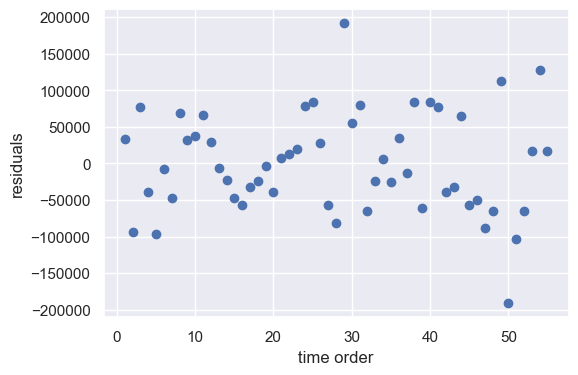

In [28]:
#autokorelasi
# residuals model regresi linier berganda
residual = result_dummy.resid

## membuat plot residuals vs time order

# membuat list time order
time1=list(range(1,55+1))
print (time1)
plt.figure(figsize=(6,4))
plt.scatter(x=time1, y=residual)
plt.xlabel('time order', fontsize=12)
plt.ylabel('residuals', fontsize=12)
plt.show()

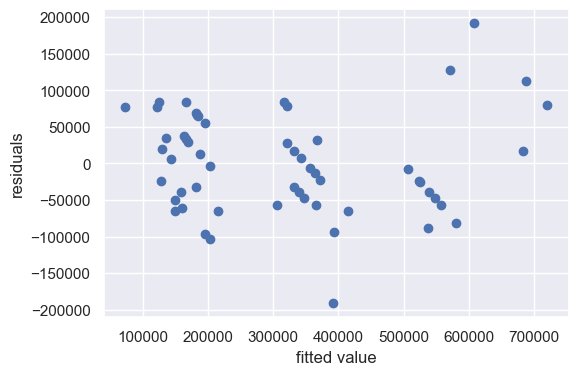

In [29]:
#heteroskesdasitas
plt.figure(figsize=(6,4))
plt.scatter(x=result_dummy.fittedvalues, y=residual)
plt.xlabel('fitted value', fontsize=12)
plt.ylabel('residuals', fontsize=12)
plt.show()

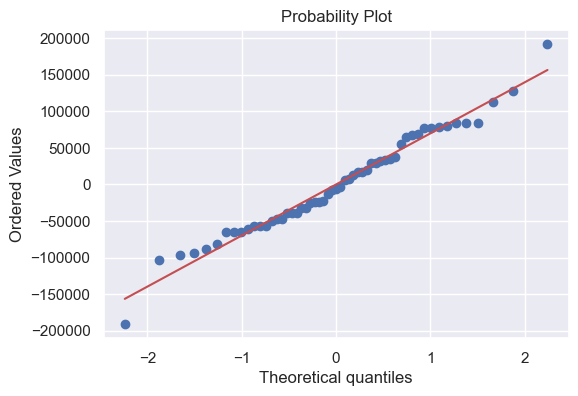

In [30]:
from statsmodels.graphics.gofplots import qqplot
import pylab 
import scipy.stats as stats

# membuat q-q plot
plt.figure(figsize=(6,4))
stats.probplot(result_dummy.resid, dist="norm", plot=pylab)
pylab.show()

In [31]:
# Menghitung residu model
residuals = result_onehot.resid

# Uji Shapiro-Wilk
shapiro_stat, shapiro_pvalue = stats.shapiro(residuals)
print("Shapiro-Wilk Test")
print(f"Statistic: {shapiro_stat}")
print(f"P-value: {shapiro_pvalue}")
if shapiro_pvalue > 0.05:
    print("Tidak ada bukti yang cukup untuk menolak asumsi normalitas (distribusi residual terdapat pada distribusi normal)")
else:
    print("Terdapat bukti yang cukup untuk menolak asumsi normalitas (distribusi residual tidak terdapat pada distribusi normal)")

# Uji Kolmogorov-Smirnov
ks_stat, ks_pvalue = stats.kstest(residuals, 'norm')
print("\nKolmogorov-Smirnov Test")
print(f"Statistic: {ks_stat}")
print(f"P-value: {ks_pvalue}")
if ks_pvalue > 0.05:
    print("Tidak ada bukti yang cukup untuk menolak asumsi normalitas (distribusi residual terdapat pada distribusi normal)")
else:
    print("Terdapat bukti yang cukup untuk menolak asumsi normalitas (distribusi residual tidak terdapat pada distribusi normal)")

Shapiro-Wilk Test
Statistic: 0.9814475178718567
P-value: 0.552029550075531
Tidak ada bukti yang cukup untuk menolak asumsi normalitas (distribusi residual terdapat pada distribusi normal)

Kolmogorov-Smirnov Test
Statistic: 0.5272727272727272
P-value: 8.802811848728441e-15
Terdapat bukti yang cukup untuk menolak asumsi normalitas (distribusi residual tidak terdapat pada distribusi normal)


# Uji Asumsi Multikolinerietas

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Perform one-hot encoding

df_dummy = pd.get_dummies(df, drop_first=True)

# Calculate VIF
X_dummy = sm.add_constant(df_dummy.drop(columns=['Pengeluaran_perminggu']))
vif = pd.DataFrame()
vif["Variable"] = X_dummy.columns
vif["VIF"] = [variance_inflation_factor(X_dummy.values, i) 
             for i in range(X_dummy.shape[1])]

print(vif)

                     Variable        VIF
0                       const  27.825635
1             Frekuensi_makan   1.404250
2           Pengeluaran_makan   1.288086
3              Uang_Transport   2.334235
4                       Jarak   1.820378
5         Frekuensi_Nongkrong   1.948256
6                  Organisasi   1.344319
7   Transportasi_nebeng temen   1.210310
8           Transportasi_ojek   2.397370
9                    Rokok_Ya   2.013179
10                 Laundry_Ya   1.555078


Uji